In [1]:
import math
from math import sin
from math import cos
from scipy.integrate import ode
import matplotlib.pyplot as plt
import numpy as np

Let's perform non-dimensionalization: $l = 1$, $g = 1$, $m = 1$.

In [2]:
# Setting up parameters
class parameters:
    eps = 0.1
    T = 2 * math.pi * eps
    
params = parameters()

Hamiltonian will be as follows:$$H = \dfrac{p^2}{2} - A p \sin{q}\sin\dfrac{t}{\varepsilon} + \dfrac{A^2}{2}\sin^2{q}\sin^2\dfrac{t}{\varepsilon} + \cos{q}.$$

In [3]:
# Hamiltonian equations
def right_part(t, y, A, mu): # y = [q, p]
    ans = [0, 0]
    ans[0] = y[1] - A * sin(y[0]) * sin(t / params.eps)
    ans[1] = A * y[1] * cos(y[0]) * sin(t / params.eps) \
                - A * A * sin(y[0]) * cos(y[0]) * sin(t / params.eps) * sin(t / params.eps) \
                + sin(y[0]) - mu * ans[0]
    return ans

In [4]:
# Integrate Hamiltonian equations
def get_trajectory(t_0, t_max, q_0, p_0, A, mu, step) :
    q = np.array([q_0])
    p = np.array([p_0])

    integr = ode(right_part).set_integrator('dopri5')
    integr.set_initial_value([q_0, p_0], t_0)
    integr.set_f_params(A, mu)

    while integr.successful() and integr.t < t_max:
        integr.integrate(integr.t + step)
        q = np.append(q, [integr.y[0]])
        p = np.append(p, [integr.y[1]])
    if not integr.successful():
        print('Integration failed on some step')
    return q, p

# Get Poincare map on a cylinder
def get_cylinder_traj(t_0, t_max, q_0, p_0, A, mu) :
    q, p = get_trajectory(t_0, t_max, q_0, p_0, A, mu, params.T)
    q_cyl = (q + math.pi) % (2 * math.pi) - math.pi
    return q_cyl, p

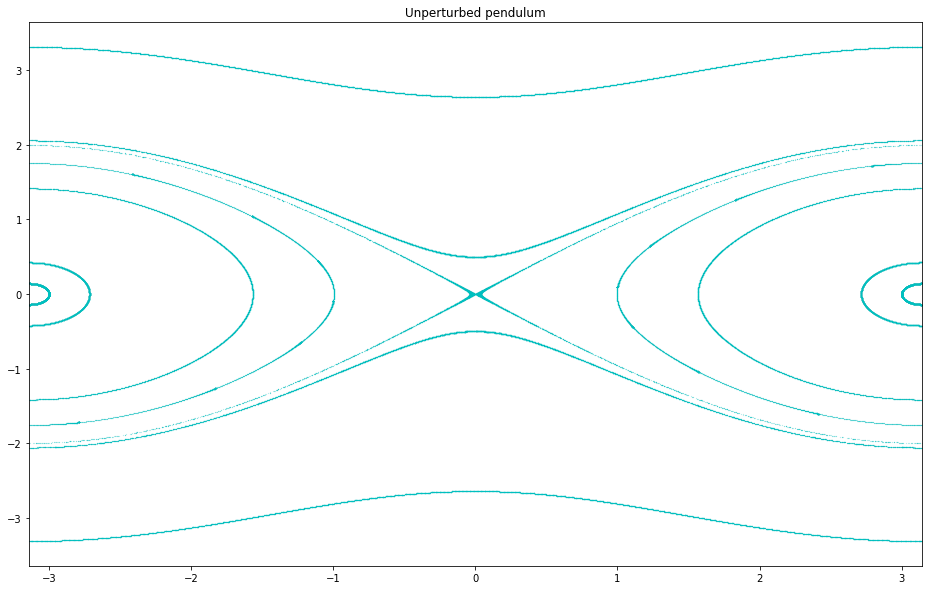

In [5]:
# Unperturbed pendulum
fig = plt.figure(figsize=(16, 10))
plt.xlim(-math.pi, math.pi)

t_0 = 0
t_max = 10000 * params.T # 10000 dots
A = 0
mu = 0

q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=1, p_0=0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/2, p_0=-0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/2, p_0=3, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/2, p_0=-3, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/2, p_0=1.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/2, p_0=-1.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi-0.1, p_0=-0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi-0.3, p_0=-0.3, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.2, color='c')

plt.title('Unperturbed pendulum')
plt.show()

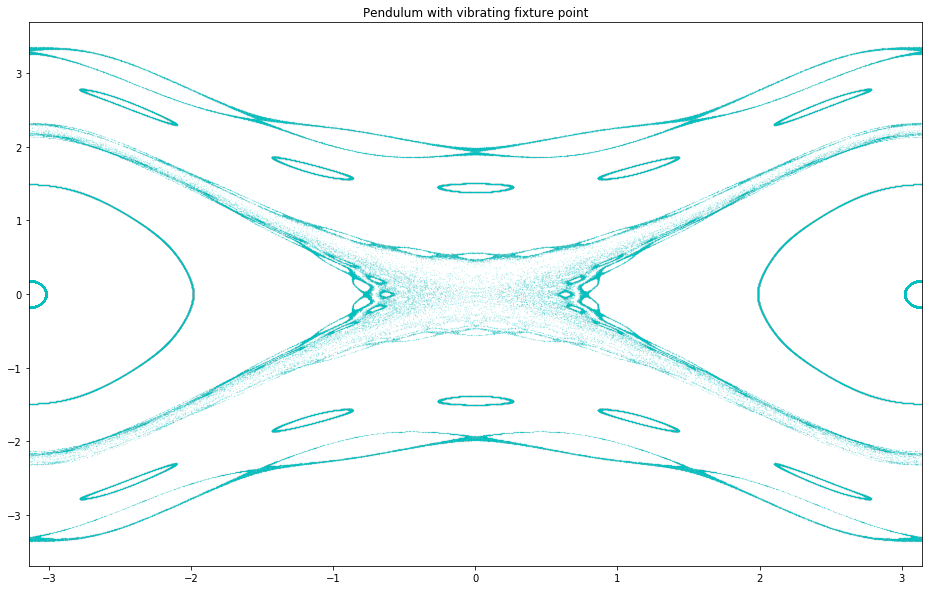

In [6]:
# Pendulum with vibrating fixture point
fig = plt.figure(figsize=(16, 10))
plt.xlim(-math.pi, math.pi)

t_0 = 0
t_max = 30000 * params.T # 30000 dots
A = 1
mu = 0

q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=2, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=-2, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=1.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=-1.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=1, p_0=0.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi/3, p_0=-0.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=2*math.pi/3, p_0=-0.5, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=math.pi-0.1, p_0=-0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')

plt.title('Pendulum with vibrating fixture point')
plt.show()

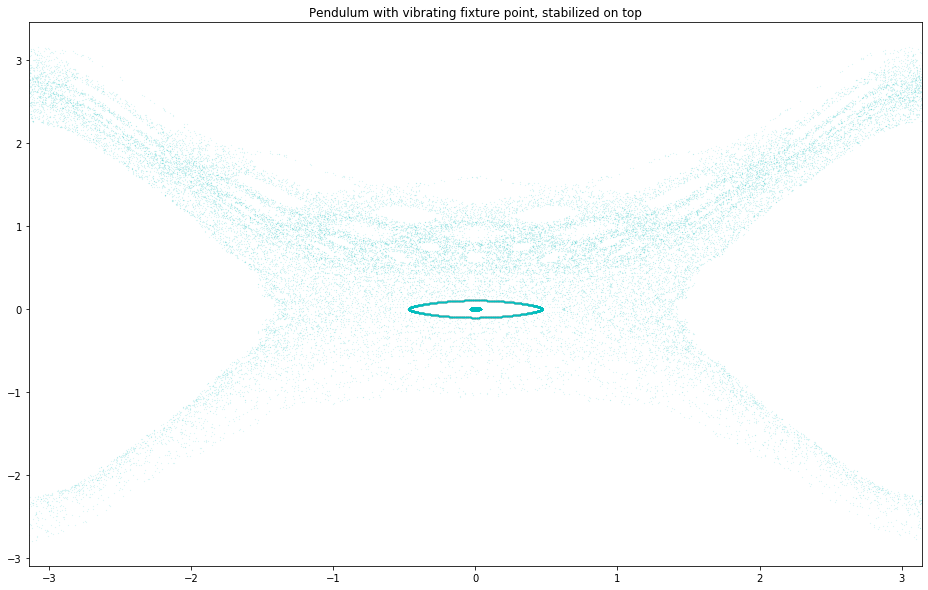

In [7]:
# Pendulum with vibrating fixture point, stabilized on top
fig = plt.figure(figsize=(16, 10))
plt.xlim(-math.pi, math.pi)

t_0 = 0
t_max = 30000 * params.T # 30000 dots
A = math.sqrt(2) + 0.1
mu = 0

q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.01, p_0=0.01, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.15, p_0=0.15, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')

plt.title('Pendulum with vibrating fixture point, stabilized on top')
plt.show()

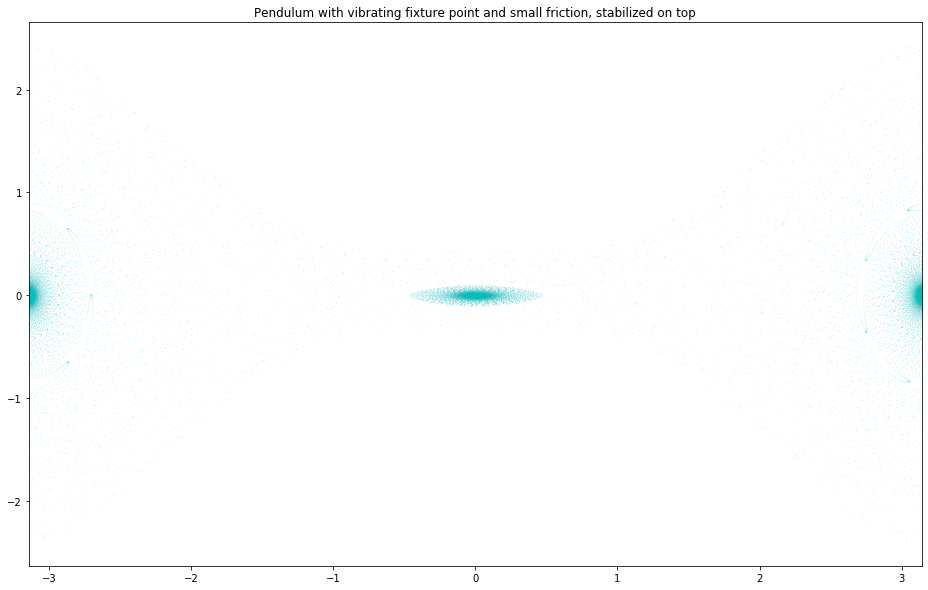

In [8]:
# Pendulum with vibrating fixture point and small friction, stabilized on top
fig = plt.figure(figsize=(16, 10))
plt.xlim(-math.pi, math.pi)

t_0 = 0
t_max = 30000 * params.T # 30000 dots
A = math.sqrt(2) + 0.1
mu = 0.001

q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.01, p_0=0.01, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.1, p_0=0.1, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.15, p_0=0.15, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
plt.title('Pendulum with vibrating fixture point and small friction, stabilized on top')
plt.show()

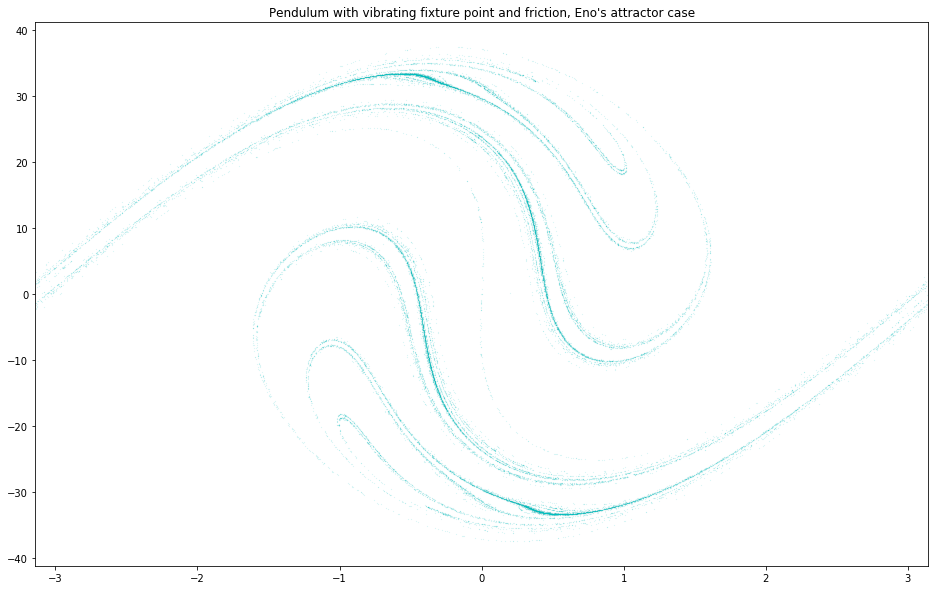

In [9]:
# Pendulum with vibrating fixture point and friction, Eno's attractor case
fig = plt.figure(figsize=(16, 10))
plt.xlim(-math.pi, math.pi)

t_0 = 0
t_max = 30000 * params.T # 30000 dots
A = 40
mu = 2

q, p = get_cylinder_traj(t_0=t_0, t_max=t_max, q_0=0.2, p_0=0.2, A=A, mu=mu)
plt.plot(q, p, '.', markersize=0.1, color='c')
plt.title("Pendulum with vibrating fixture point and friction, Eno's attractor case")
plt.show()